<a href="https://colab.research.google.com/github/AbdullahAlshamrani0/IDS/blob/main/HW4/Problem2R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#R Language



In [29]:
# Loading the dataset
url <- "https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv"
data <- read.csv(url, header = TRUE)


In [30]:
#Sort the data set by saturated_ fat and produce a listing of the five food items highest in saturated fat. Comment on the validity of comparing food items of different sizes.
top_saturated_fat <- head(arrange(data, desc(saturated_fat)), 5)
print("Top 5 food items highest in saturated fat:")
print(top_saturated_fat)


[1] "Top 5 food items highest in saturated fat:"
                               food.item weight_in_grams saturated_fat
1 CHEESECAKE                    1 CAKE              1110         119.9
2 ICE CREAM; VANLLA; RICH 16% FT1/2 GAL             1188         118.3
3 YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE              1108          92.0
4 CREME PIE                     1 PIE                910          90.1
5 LARD                          1 CUP                205          80.4
  cholesterol
1        2053
2         703
3         609
4          46
5         195


In [31]:
#Create a new variable, saturated_ fat_ per_gram, by dividing the amount of saturated fat  by the weight in grams. Sort the data set by saturated_ fat_ per_gram and produce a listing of the five food  items highest in saturated fat per gram. Which food has the most saturated fat per gram?
data$saturated_fat_per_gram <- data$saturated_fat / data$weight_in_grams

top_saturated_fat_per_gram <- head(arrange(data, desc(saturated_fat_per_gram)), 5)
print("Top 5 food items highest in saturated fat per gram:")
print(top_saturated_fat_per_gram)


[1] "Top 5 food items highest in saturated fat per gram:"
                               food.item weight_in_grams saturated_fat
1 BUTTER; SALTED                1 TBSP                14           7.1
2 BUTTER; UNSALTED              1 TBSP                14           7.1
3 BUTTER; SALTED                1/2 CUP              113          57.1
4 BUTTER; UNSALTED              1/2 CUP              113          57.1
5 BUTTER; SALTED                1 PAT                  5           2.5
  cholesterol saturated_fat_per_gram
1          31              0.5071429
2          31              0.5071429
3         247              0.5053097
4         247              0.5053097
5          11              0.5000000


[1] "Food items as outliers at the high end of the scale:"
 [1] "CHOCOLATE; BITTER OT BAKING   1 OZ    "
 [2] "COCONUT; RAW; SHREDDED        1 CUP   "
 [3] "COCONUT; DRIED; SWEETND;SHREDD1 CUP   "
 [4] "COCONUT; RAW; PIECE           1 PIECE "
 [5] "BUTTER; SALTED                1/2 CUP "
 [6] "BUTTER; UNSALTED              1/2 CUP "
 [7] "LARD                          1 CUP   "
 [8] "FATS; COOKING/VEGETBL SHORTENG1 TBSP  "
 [9] "LARD                          1 TBSP  "
[10] "FATS; COOKING/VEGETBL SHORTENG1 CUP   "
[11] "BUTTER; SALTED                1 TBSP  "
[12] "BUTTER; UNSALTED              1 TBSP  "
[13] "BUTTER; SALTED                1 PAT   "
[14] "BUTTER; UNSALTED              1 PAT   "
[15] "IMITATION CREAMERS; POWDERED  1 TSP   "
[16] "  28.35"                               
[17] "  80.00"                               
[18] "  93.00"                               
[19] "  45.00"                               
[20] " 113.00"                               
[21] " 113.00"       

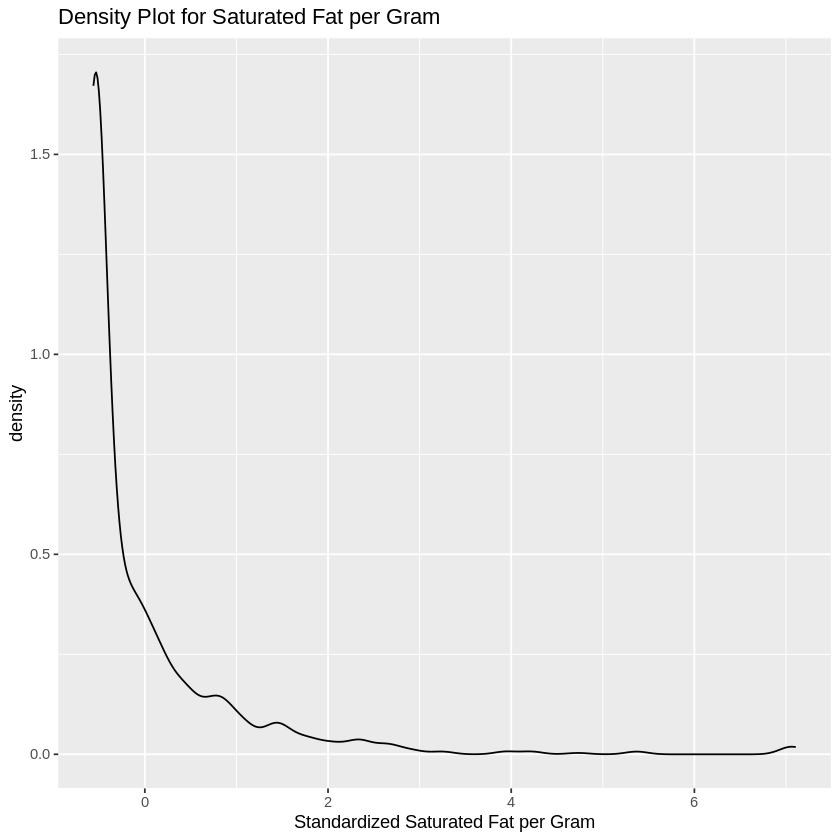

In [32]:
#Standardize (zero mean) the field saturated_ fat_ per_gram, and produce a listing of all the food items that are outliers at the high end of the scale. How many food items are outliers at the low end of the scale? Create a density plot for saturated_ fat_ per_gram
data$standardized_saturated_fat_per_gram <- scale(data$saturated_fat_per_gram)

high_end_outliers <- data[data$standardized_saturated_fat_per_gram > 3]  # Adjust the threshold as needed
print("Food items as outliers at the high end of the scale:")
print(high_end_outliers)

# Ploting for saturated_ fat_ per_gram
density_plot <- ggplot(data, aes(x = standardized_saturated_fat_per_gram)) +
  geom_density() +
  labs(title = "Density Plot for Saturated Fat per Gram", x = "Standardized Saturated Fat per Gram")
print(density_plot)



In [33]:
# Are there any missing values? If so, impute as necessary and explain your approach.
missing_values <- colSums(is.na(data))
print("Missing values:")
print(missing_values)


[1] "Missing values:"
             food.item        weight_in_grams          saturated_fat 
                     0                      0                      0 
           cholesterol saturated_fat_per_gram                        
                     0                      0                      0 


In [34]:
#Standardize (zero mean) the numeric variables, and determine if there are any outliers.
numeric_cols <- sapply(data, is.numeric)
data[numeric_cols] <- scale(data[numeric_cols])

#Summary

1. High Saturated Fat Foods: The top 5 foods highest in saturated fat. However, comparing them directly is tricky because they come in different sizes.


2. Saturated Fat per Gram: We made a fairer comparison by looking at saturated fat per gram. This showed us which foods are dense in saturated fat.


3. Outliers: Some foods had very high or low saturated fat per gram. We also checked for extreme values in other data.


